<a href="https://colab.research.google.com/drive/1nVjFw-o83JHV9KYVQx5XXraa7awcLIHS">Abre este Jupyter en Google Colab</a>

# División del conjunto de datos

En este notebook se muestran algunos de los mecanismos más utilizados para la división del conjunto de datos.

## Conjunto de datos

### Descripción
NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set which are mentioned in. Although, this new version of the KDD data set still suffers from some of the problems discussed by McHugh and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods. Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.

### Ficheros de datos
* <span style="color:green">**KDDTrain+.ARFF**: The full NSL-KDD train set with binary labels in ARFF format</span>
* KDDTrain+.TXT: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format
* KDDTrain+_20Percent.ARFF:	A 20% subset of the KDDTrain+.arff file
* KDDTrain+_20Percent.TXT:	A 20% subset of the KDDTrain+.txt file
* KDDTest+.ARFF:	The full NSL-KDD test set with binary labels in ARFF format
* KDDTest+.TXT:	The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
* KDDTest-21.ARFF:	A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21
* KDDTest-21.TXT:	A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21

Si nos fijamos, este conjunto de datos ya viene dividido en conjunto de datos de entrenamiento y conjunto de datos de prueba y luego puedo dividir el conjunto de datos de prueba en test y validación.

**Nosotros vamos a considerar que el train set es el conjunto total y lo vamos a partir en tres: entrenamiento, prueba y validación.**

### Descarga de los ficheros de datos
https://iscxdownloads.cs.unb.ca/iscxdownloads/NSL-KDD/#NSL-KDD

### Referencias adicionales sobre el conjunto de datos
_M. Tavallaee, E. Bagheri, W. Lu, and A. Ghorbani, “A Detailed Analysis of the KDD CUP 99 Data Set,” Submitted to Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA), 2009._

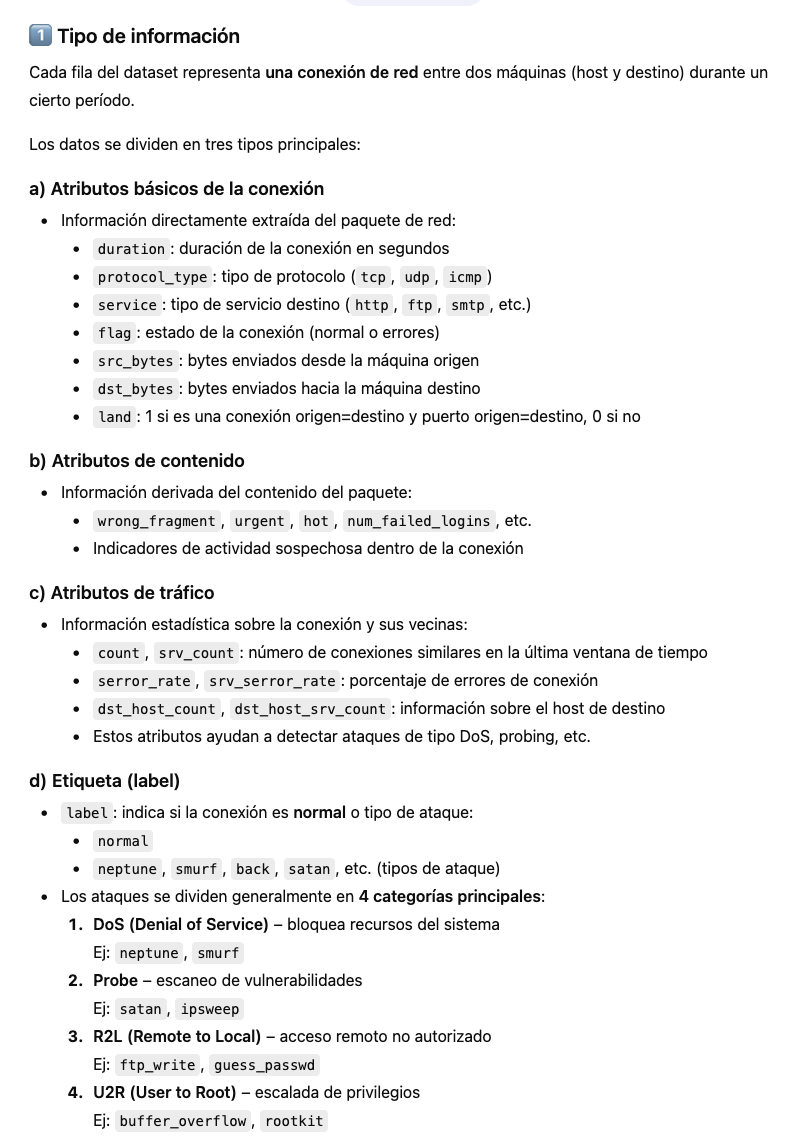


## 1. Lectura del conjunto de datos

In [1]:
!pip install liac-arff

In [2]:
import arff
import pandas as pd

In [3]:
def load_kdd_dataset(data_path):
    """Lectura del conjunto de datos NSL-KDD."""
    with open(data_path, 'r') as train_set:
        dataset = arff.load(train_set)
    attributes = [attr[0] for attr in dataset["attributes"]]
    return pd.DataFrame(dataset["data"], columns=attributes)

In [12]:
import arff
import pandas as pd

# Nombres de columnas del NSL-KDD
COLUMNS = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
    'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
    'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
    'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
    'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',
    'label'
]

def load_kdd_dataset(data_path):
    dataset_gen = arff.load(data_path)  # Generador de filas
    data = list(dataset_gen)            # Convertir a lista de tuplas
    df = pd.DataFrame(data, columns=COLUMNS)
    return df

df = load_kdd_dataset("datasets/NSL-KDD/KDDTrain+.arff")
print(df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes land  \
0       0.0           tcp  ftp_data   SF      491.0        0.0    0   
1       0.0           udp     other   SF      146.0        0.0    0   
2       0.0           tcp   private   S0        0.0        0.0    0   
3       0.0           tcp      http   SF      232.0     8153.0    0   
4       0.0           tcp      http   SF      199.0      420.0    0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0             0.0     0.0  0.0  ...                25.0   
1             0.0     0.0  0.0  ...                 1.0   
2             0.0     0.0  0.0  ...                26.0   
3             0.0     0.0  0.0  ...               255.0   
4             0.0     0.0  0.0  ...               255.0   

  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                   0.17                    0.03                         0.17   
1                   0.00                    0.60        

In [17]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

## 2. División del conjunto de datos

Se debe separar el conjunto de datos en los diferentes subconjuntos necesarios para realizar los procesos de entrenamiento, validación y pruebas. Sklearn tiene implementada la función **train_test_split**.

In [18]:
# Separamos el conjunto de datos 60% train set, 40% test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)

In [19]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75583 entries, 98320 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  float64
 5   dst_bytes                    75583 non-null  float64
 6   land                         75583 non-null  object 
 7   wrong_fragment               75583 non-null  float64
 8   urgent                       75583 non-null  float64
 9   hot                          75583 non-null  float64
 10  num_failed_logins            75583 non-null  float64
 11  logged_in                    75583 non-null  object 
 12  num_compromised              75583 non-null  float64
 13  root_shell      

In [16]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50390 entries, 378 to 89600
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     50390 non-null  float64
 1   protocol_type                50390 non-null  object 
 2   service                      50390 non-null  object 
 3   flag                         50390 non-null  object 
 4   src_bytes                    50390 non-null  float64
 5   dst_bytes                    50390 non-null  float64
 6   land                         50390 non-null  object 
 7   wrong_fragment               50390 non-null  float64
 8   urgent                       50390 non-null  float64
 9   hot                          50390 non-null  float64
 10  num_failed_logins            50390 non-null  float64
 11  logged_in                    50390 non-null  object 
 12  num_compromised              50390 non-null  float64
 13  root_shell         

In [20]:
# Separamos el conjunto de datos de pruebas 50% validation set, 50% test set
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

In [21]:
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 75583
Longitud del Validation Set: 25195
Longitud del Test Set: 25195


## 3. Particionado aleatorio y Stratified Sampling

Sklearn tiene implementa la función **train_test_split**, sin embargo, esta función por defecto realiza un particionado del conjunto de datos aleatorio para cada vez que se ejecuta el script. Aún añadiendo una semilla fija para generación aleatoria, cada vez que carguemos de nuevo el conjunto de datos se generarán nuevos subconjuntos. Esto puede ocasionar que después de mucho intentos, el algoritmo "vea" todo el conjunto de datos.

Para solucionar este problema, Sklearn ha introducido el parámetro **shuffle** en la función **train_test_split**.

In [22]:
# Si shuffle=False, el conjunto de datos no mezclará antes del particionado
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, shuffle=False)

Estos métodos para dividir el conjunto de datos estan bien si tienes un conjunto de datos muy grande, pero si no lo tienes, corres el riesgo de introducir **sampling bias**. (si parto mi conjunto de datos como hemos comentado, y todos los flujos que tienen un mismo valor para una característica están ordenados y caen en el primer conjunto de datos, no tendríamos valores para el resto conjunto de datos (test y validación) y de este modo romperíamos la tendencia de nuestro conjunto de datos. Los tres subconjuntos deben mantener la misma proporción de valores que en el conjunto original).

Para evitar esto, se utiliza un metodo de sampling que se llama **Stratified sampling**. La población es dividida en subconjuntos homogéneos llamados **strata**. El objetivo es que no quede ninguna característica del conjunto de datos sin representación en ninguno de los conjuntos de datos para una o más características en particular.

Sklearn introduce el parámetro **stratify** en la función **train_test_split** para controlar este comportamiento.

_This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify._

_For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's._

_https://stackoverflow.com/a/38889389_

In [24]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, stratify=df["protocol_type"])

## 4. Generación de una función de particionado

In [25]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [26]:
print("Longitud del conjunto de datos:", len(df))

Longitud del conjunto de datos: 125973


In [27]:
train_set, val_set, test_set = train_val_test_split(df, stratify='protocol_type')

In [28]:
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 75583
Longitud del Validation Set: 25195
Longitud del Test Set: 25195


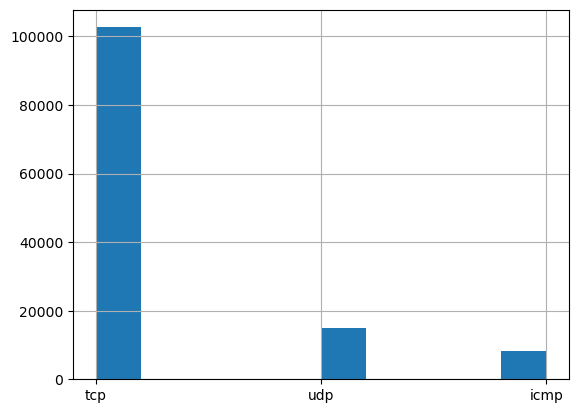

In [29]:
# Comprobación de que stratify mantiene la proporcion de la característica en los conjuntos
%matplotlib inline
import matplotlib.pyplot as plt
df["protocol_type"].hist()
plt.show()

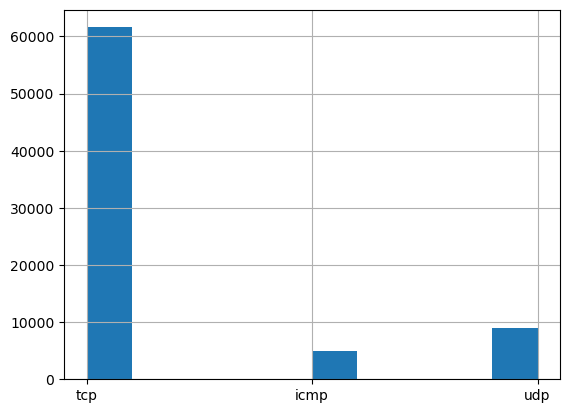

In [30]:
train_set["protocol_type"].hist()
plt.show()

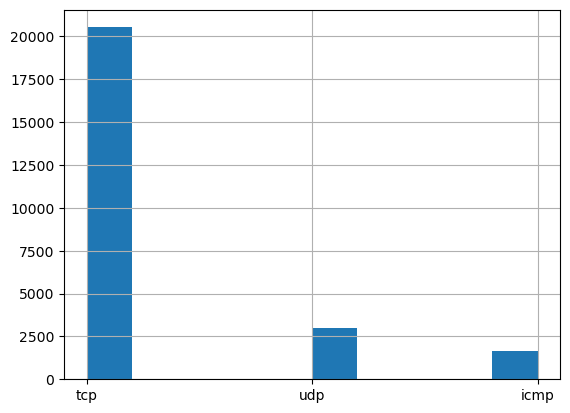

In [31]:
val_set["protocol_type"].hist()
plt.show()

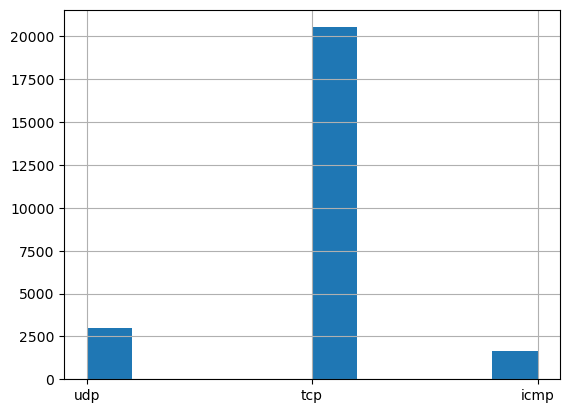

In [32]:
test_set["protocol_type"].hist()
plt.show()